<a href="https://colab.research.google.com/github/Adarshkumar61/Colab-Unsupervised_Cluster_models_ML/blob/main/customer_segmentation_using_kMeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the required modules

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

Loading the dataset

In [ ]:
customer_data = pd.read_csv('/content/Mall_Customers.csv')

In [ ]:
# customer_data.head(10)
customer_data.shape

(200, 5)

checking if there is any missing value is present in our dataset or not

In [ ]:
customer_data.isnull().sum()
#so there are no missing value in our dataset so we will move forward

,0
CustomerID,0
Gender,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


Now we will take the only relevent columns from our dataset which is col:3 and col:4

In [ ]:
x = customer_data.iloc[:,[3,4]].values
# or:
# x = customer_data.iloc[:, 3:5].values
print(x)

[[ 15  39]
 [ 15  81]
 [ 16   6]
 [ 16  77]
 [ 17  40]
 [ 17  76]
 [ 18   6]
 [ 18  94]
 [ 19   3]
 [ 19  72]
 [ 19  14]
 [ 19  99]
 [ 20  15]
 [ 20  77]
 [ 20  13]
 [ 20  79]
 [ 21  35]
 [ 21  66]
 [ 23  29]
 [ 23  98]
 [ 24  35]
 [ 24  73]
 [ 25   5]
 [ 25  73]
 [ 28  14]
 [ 28  82]
 [ 28  32]
 [ 28  61]
 [ 29  31]
 [ 29  87]
 [ 30   4]
 [ 30  73]
 [ 33   4]
 [ 33  92]
 [ 33  14]
 [ 33  81]
 [ 34  17]
 [ 34  73]
 [ 37  26]
 [ 37  75]
 [ 38  35]
 [ 38  92]
 [ 39  36]
 [ 39  61]
 [ 39  28]
 [ 39  65]
 [ 40  55]
 [ 40  47]
 [ 40  42]
 [ 40  42]
 [ 42  52]
 [ 42  60]
 [ 43  54]
 [ 43  60]
 [ 43  45]
 [ 43  41]
 [ 44  50]
 [ 44  46]
 [ 46  51]
 [ 46  46]
 [ 46  56]
 [ 46  55]
 [ 47  52]
 [ 47  59]
 [ 48  51]
 [ 48  59]
 [ 48  50]
 [ 48  48]
 [ 48  59]
 [ 48  47]
 [ 49  55]
 [ 49  42]
 [ 50  49]
 [ 50  56]
 [ 54  47]
 [ 54  54]
 [ 54  53]
 [ 54  48]
 [ 54  52]
 [ 54  42]
 [ 54  51]
 [ 54  55]
 [ 54  41]
 [ 54  44]
 [ 54  57]
 [ 54  46]
 [ 57  58]
 [ 57  55]
 [ 58  60]
 [ 58  46]
 [ 59  55]

Now we will choose No of clusters
with the help of a parameter :
wcss (within cluster sum of squares)

In [ ]:
#for finding no of clusters we use KMeans alogrithim :
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=2)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

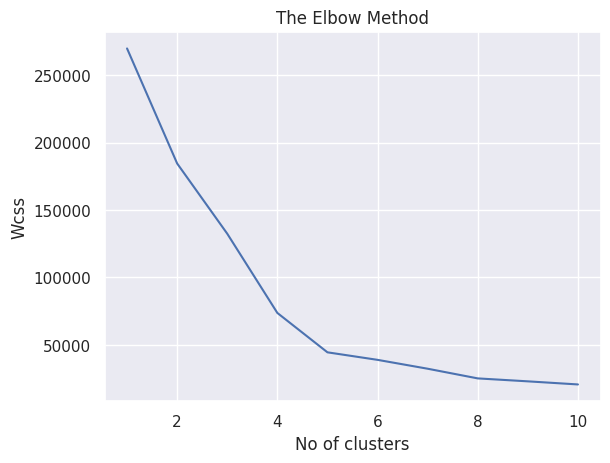

In [ ]:
sns.set()
plt.plot(range(1,11), wcss)
plt.title('The Elbow Method')
plt.xlabel('No of clusters')
plt.ylabel('Wcss')
plt.show()

No of Clusters : 5

Training the Kmeans model:
in KMeans : K represent No of clusters
so here
k =  5

In [ ]:
kmeans = KMeans(n_clusters=5, init= 'k-means++', random_state=2)
#now retruring the label for each data point


fit_predict(x) return cluster no for each data point

In [ ]:
y = kmeans.fit_predict(x)
print(y)

[3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 6 3 4 3 4 3 4 3 4 3
 4 3 4 6 4 6 6 3 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 2 5 7 5 2 1 7 1 7 5 7 1 2 1 7 1 7 1 2 5 2 1 2 5 7
 5 2 1 2 1 7 1 2 1 7 1 7 5 2 1 2 5 7 1 2 5 7 1 7 1 2 1 2 1 7 1 2 5 8 9 8 5
 8 9 8 9 8 9 8 9 8 9 8 9 8 9 8]


now we will visualiaze cluster and real data

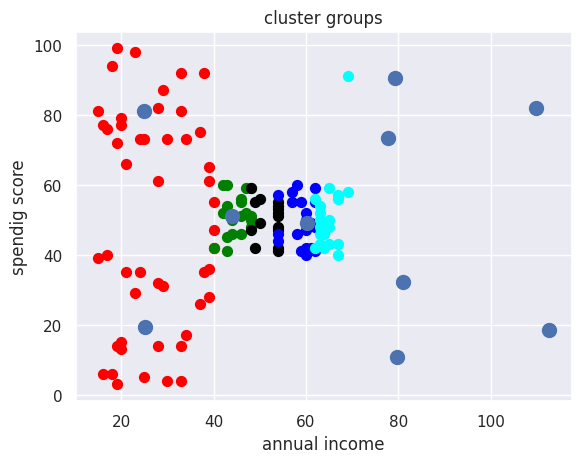

In [ ]:
plt.scatter(x[y==0,0], x[y==0,1], s=50, c= 'red', label= 'cluster1')
plt.scatter(x[y==1,0], x[y==1,1], s=50, c= 'green', label='cluster2')
plt.scatter(x[y==2,0], x[y==2,1], s=50, c= 'black', label= 'cluster3')
plt.scatter(x[y==3,0], x[y==3,1], s=50, c= 'blue', label= 'cluster4')
plt.scatter(x[y==4,0], x[y==4,1], s=50, c= 'cyan', label= 'cluster5')

plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:, 1], s=100, label= 'centeroid')
plt.title('cluster groups')
plt.xlabel('annual income')
plt.ylabel('spendig score')
plt.show()